# Etape_2 : Préparez la veille technique en NLP ou en computer vision :

Pour ce projet de test d'une technique récente dans le cadre d'une comparaison avec une modélisation déjà réalisé, je choisis de reprendre le projet de classification d'images du marketplace "Place de marché" du projet 6.  
Pour rappel, la technique utilisée était du Transfer Learning basée sur un modèle CNN : VGG16.  
Ci-dessous je présente les détails utilisés ainsi que le score obtenu.

## 2.1 - Présentation du modèle créé précédemment :

### 2.1.1 - Dataset :

Pour ce projet je choisi de reprendre le dataset de classification d'images du **Projet 6**.  
Il s'agit d'un dataset de 1050 images à classifier en 7 catégories :   
* Home Furnishing (150 images)
* Baby Care (150 images)
* Watches (150 images)
* Home Decor & Festive Needs (150 images)
* Kitchen & Dining (150 images)
* Beauty and Personal Care (150 images)
* Computers (150 images)

### 2.1.2 - Détails de la technique basée sur VGG16 :

Le modèle VGG16 est basé sur une architexture de Réseau de neurones à convolution (CNN) pré-entrainé sur le dataset "ImageNet" qui contient 14 millions d'images sur 1000 classes.

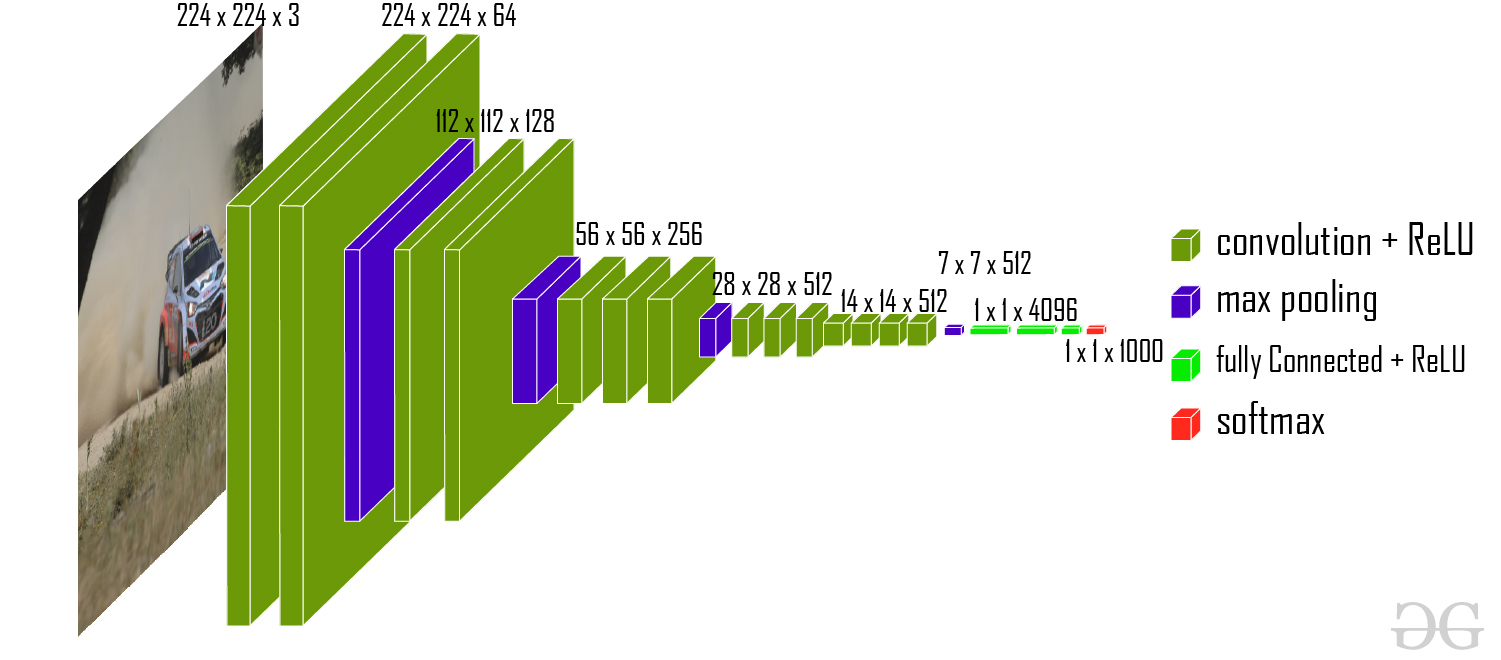

**Entrée :**  
L'image traitée en entrée est redimmensionnée en 224x224 pixels sur 3 canaux RGB.  

**Sortie :**  
On obtient en sortie un vecteur avec 1000 valeurs :  
$$
\hat{y} =
\begin{bmatrix}
\hat{y}_0 \\
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_{999}
\end{bmatrix}
$$  

Ce vecteur représente la probabilité de chacune des 1000 classes :  

$$
\hat{y} =
\begin{bmatrix}
\hat{y}_0 = 0.1 \\
0.05 \\
0.05 \\
0.03 \\
\vdots \\
\hat{y}_{780} = 0.72 \\
\vdots \\
\hat{y}_{999} = 0.05
\end{bmatrix}
$$

Pour s'assurer que ces probabilités s'additionnent à 1, on utilise la fonction **softmax**.

Cette fonction softmax est définie comme suit :

$$
\hat{y}^i = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
$$

Ici :

- $z_i$ est le score brut (logits) pour la classe $i$,
- $\sum_{j=1}^n e^{z_j}$ est la normalisation pour rendre les probabilités cohérentes.

---
### 2.1.3 - Détails de la création du modèle :

Pour l'entrainement du modèle, j'ai utilisé la Data Augmentation.

Génération d'images supplémentaires afin d'agrandir le dataset d'entrainement :

Ajout d'images avec :
* Rotation aléatoire entre +/- 20°
* Translation horizontale gauche ou droite jusqu'à 20%
* Translation verticale haut ou bas jusqu'à 20%
* Cisaillement (déformation) de l'image avec un angle maximum de 20°
* Zoom aléatoire : agrandissement ou réduction de la taille jusqu'à 20%
* Inversion horizontale de l'image
* Remplissage des pixels vides par la valeurs de pixels voisins

---
**Stratégie de modélisation :**  

Grâce au Tuner de Keras, recherche des hyperparamètres optimaux

* Chargement vgg-16 sans la tête de classification : `include_top=False`
* Conservation des poids pré-entraînés : `layer.trainable = False`
* Ajout d'une tête de classification adaptée à notre analyse :
    - `Pooling`
    - `Dense - activation ReLU`
    - `Dropout` afin de réduire le surapprentissage
    - `Dense(7, activation='softmax')` couche de classification
* Compilation du modèle avec un optimizer : `optimizer='adam'` [https://keras.io/api/optimizers/](https://keras.io/api/optimizers/)

---
**Résultats :**  

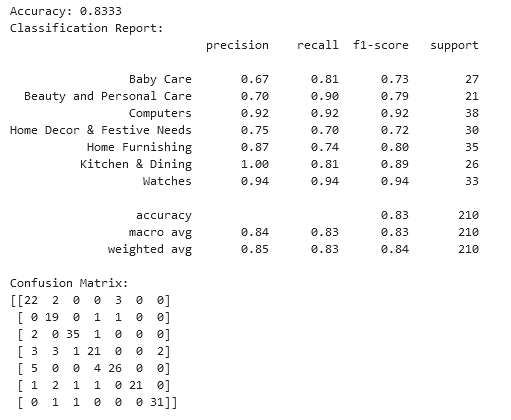

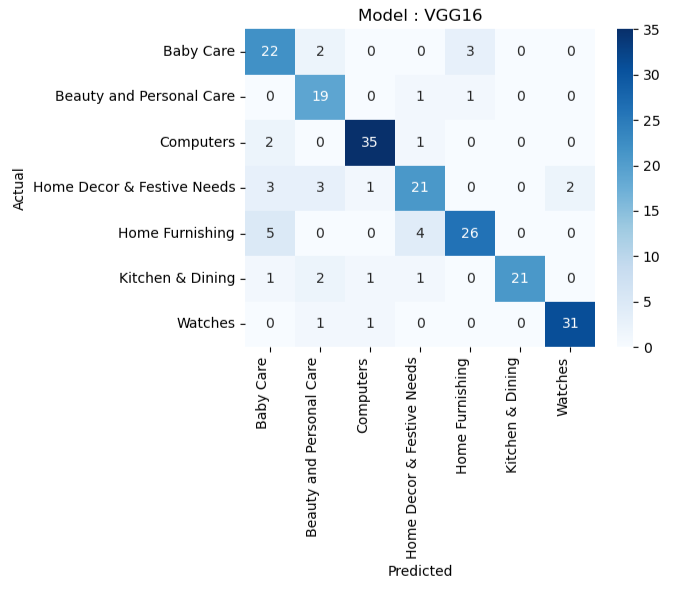

La technique de Transfer Learning basée sur le modèle VGG16 donne déjà un résultat satisfaisant.

---
### 2.1.4 - Recherche d'une technique datant de moins de 5 ans :

Après navigation et recherche sur différents sites de veille technique, j'ai pré-sélectionné 3 méthodes récentes :
* [https://news.mit.edu/2024/featup-algorithm-unlocks-high-resolution-insights-computer-vision-0318](https://news.mit.edu/2024/featup-algorithm-unlocks-high-resolution-insights-computer-vision-0318)
* [https://machinelearningmastery.com/the-vision-transformer-model/](https://machinelearningmastery.com/the-vision-transformer-model/)
* [https://arxiv.org/abs/2410.20722](https://arxiv.org/abs/2410.20722)

---
---
## 2.2 - Présentation de la méthode choisie :

---
Recherche d'une méthode/modèle récent(e) afin d'améliorer la classification de Computer Vision.  
Projet choisi : `ProtoViT`  

[https://arxiv.org/abs/2410.20722](https://arxiv.org/abs/2410.20722)  
[https://github.com/Henrymachiyu/ProtoViT](https://github.com/Henrymachiyu/ProtoViT)

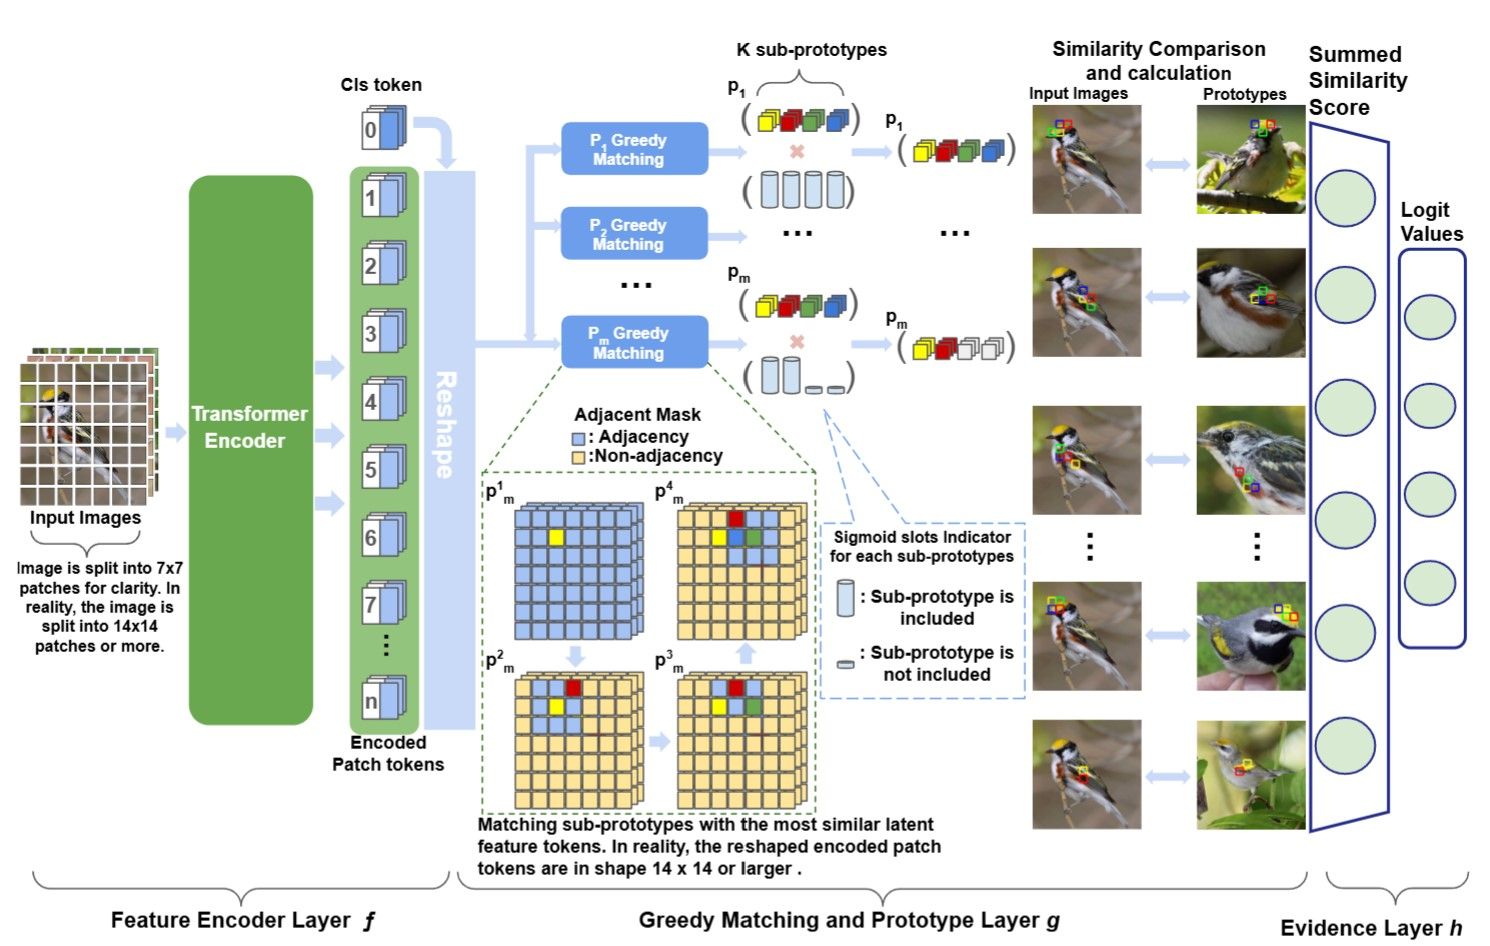

#### Requirements utilisés pour ce projet : 

* env dédié : `conda activate ProtoViT`
* GPU configuration : 1 x NVIDIA RTX 3090 (24GB) sous CUDA: 12.7

[https://huggingface.co/chiyum609/ProtoViT](https://huggingface.co/chiyum609/ProtoViT)  

[https://github.com/facebookresearch/deit/blob/main/README_cait.md](https://github.com/facebookresearch/deit/blob/main/README_cait.md)

---
### 2.2.1 - Détails de l'architecture :

**Feature Encoder Layer $f$**

Utilisation d'un transformeur (Vision Transformer - ViT) comme backbone pour encoder une image en une représentation latente.  
* Découpage de l'image en patches $16$ x $16$
* Encodage des patches : patch transformé en vecteur $z_{\text{patch}}^i \in \mathbb{R}^d$
* Ajout d'un **token de classe** ($\text{Cls token}$) pour représenter l’image entière
* Passage par le transformeur - sortie -> tokens encodés
* Tokens finaux : $z_f^i$

**Greedy Matching and Prototype Layer $g$**

Comparer les tokens latents $z_f$ de l'image avec les prototypes appris.  
* Définition des prototypes $p_j$ composé de $K$ sous-prototypes $p_k^j$
* Algorithme de **Greedy Matching** :
    * chaque sous-prototype $p_k^j$ est comparé avec les tokens latents $z_i^f$ à l'aide de **la similarité cosinus** : $\text{cos}(z_f^i, p_k^j) = \frac{z_f^i \cdot p_k^j}{\|z_f^i\| \|p_k^j\|}$
    * l'algorithme sélectionne la paire $(z_f^i, p_k^j)$ ayant la similarité maximale
* Masque de contiguïté (Adjency Mask) : empêche l’association de sous-prototypes éloignés géométriquement dans l’image
* Mécanisme de slots adaptatifs : une fonction sigmoïde décide inclusion ou exclusion des sous-prototypes (paramètres appris lors de l'entrainement)
* Calcul de la similarité totale entre un prototypes et les tokens latents

**Evidence Layer $h$**

Convertir les similarités des prototypes en scores logits pour la classification finale.  
* Agrégation des similarités : Les similarités calculées pour chaque prototype sont combinées en un vecteur de scores pour chaque classe.
* Logits (forme brute des "scores") et Softmax : normalisation des scores par une couche **Fully Connected** puis transformation en probabilité par une fonction softmax.